In [15]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
oov_tok = "<!@#>"
training_size = 20000 #27000 dataset size

In [20]:
with open('../Datasets/sarcasm.json','r') as f:
    datastore = json.load(f)

In [21]:
sentences = []
labels = []

In [22]:
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [23]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [24]:
len(testing_sentences)

6709

In [25]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token= oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, truncating= trunc_type, maxlen = max_length)

In [26]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [28]:
import numpy as np
training_padded = np.array(padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
    padded,
    training_labels,
    epochs=30,
    validation_data=(testing_padded, testing_labels),
    verbose= 2
)

In [31]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? former <!@#> store clerk sues over secret 'black <!@#> for minority shoppers
mom starting to fear son's web series closest thing she will have to grandchild
1


In [32]:
print(word_index)

'osha': 24558, 'buzzed': 24559, 'tilsen': 24560, 'reservation': 24561, 'nspw2017': 24562, 'brownies': 24563, 'coogler': 24564, 'wakanda': 24565, "charlottesville's": 24566, 'surrender': 24567, '612th': 24568, 'bracelet': 24569, 'pharmacy': 24570, 'damore': 24571, 'abuzz': 24572, 'burma': 24573, 'mania': 24574, "marketer's": 24575, "'slangry'": 24576, 'filibusters': 24577, 'corrections': 24578, 'refrain': 24579, 'chants': 24580, "'fawlty": 24581, "towers'": 24582, 'deportations': 24583, "cup's": 24584, 'mooney': 24585, 'banter': 24586, 'snatching': 24587, 'boynton': 24588, 'robinson': 24589, '104': 24590, "'effing'": 24591, 'beacon': 24592, "seymour's": 24593, 'stormtroopers': 24594, "lord'": 24595, "cowell's": 24596, 'introverted': 24597, 'attorneys': 24598, 'cleansed': 24599, 'crisp': 24600, 'dapperly': 24601, 'cate': 24602, 'blanchett': 24603, 'grover': 24604, "'apartheid": 24605, "state'": 24606, 'relied': 24607, 'electronics': 24608, '1971': 24609, 'fests': 24610, 'halfpipe': 24611

In [33]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [34]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
print(model.predict(padded))

[[9.701359e-01]
 [2.448647e-09]]


LSTM VERSION


In [38]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [39]:
lstm_history = lstm_model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4181 - accuracy: 0.7969 - val_loss: 0.3828 - val_accuracy: 0.8281
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2316 - accuracy: 0.9078 - val_loss: 0.3562 - val_accuracy: 0.8504
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1682 - accuracy: 0.9367 - val_loss: 0.3885 - val_accuracy: 0.8405
Epoch 4/10
625/625 [==============================] - 15s 23ms/step - loss: 0.1205 - accuracy: 0.9564 - val_loss: 0.4622 - val_accuracy: 0.8387
Epoch 5/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0848 - accuracy: 0.9718 - val_loss: 0.5090 - val_accuracy: 0.8344
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.5575 - val_accuracy: 0.8381
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.6940 - val_accuracy:

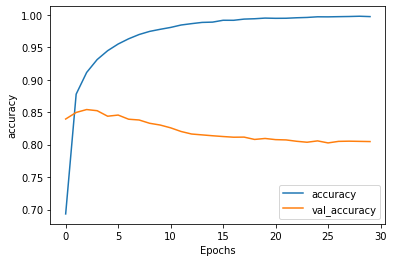

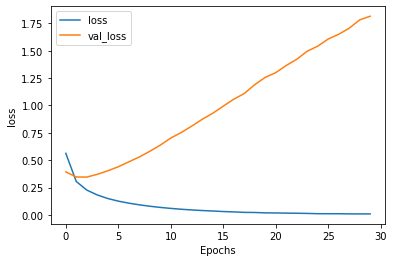

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

CONVOLUTIONAL LAYER VERSION

In [41]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
conv_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history_conv = lstm_model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 1.0683 - val_accuracy: 0.8220
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 1.1604 - val_accuracy: 0.8232
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 1.1620 - val_accuracy: 0.8190
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 1.3033 - val_accuracy: 0.8256
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 1.4873 - val_accuracy: 0.8234
Epoch 6/10
625/625 [==============================] - 15s 25ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 1.4366 - val_accuracy: 0.8252
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 1.4104 - val_accuracy: